In [2]:
import tensorflow as tf
import keras
from keras import layers

from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(x_train,_), (x_test,_) = fashion_mnist.load_data()

In [4]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

x_train = x_train.reshape(len(x_train), 28, 28, 1)
x_test = x_test.reshape(len(x_test), 28, 28, 1)

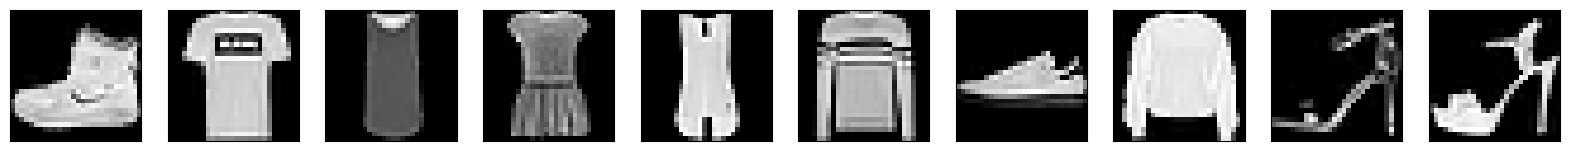

In [5]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [6]:
# adding noise 
n_factor = 0.3

n_x_train = x_train + n_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
n_x_test = x_test + n_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

n_x_train = np.clip(n_x_train, 0.0, 1.0)
n_x_test = np.clip(n_x_test, 0.0, 1.0)

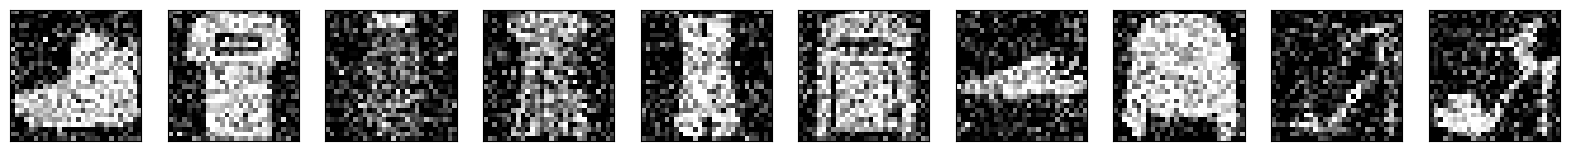

In [7]:
n=10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(n_x_train[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

In [8]:
n_x_train = n_x_train.reshape(len(n_x_train), 784)
n_x_test = n_x_test.reshape(len(n_x_test), 784)

x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)


In [9]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(512, activation='relu')(input)
encoded = layers.Dense(256, activation='relu')(encoded)
encoded = layers.Dense(128, activation='relu')(encoded)
encoded = layers.Dense(64, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(256, activation='relu')(decoded)
decoded = layers.Dense(512, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input, decoded)


In [16]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [17]:
autoencoder.fit(n_x_train, x_train, batch_size=256, epochs=50, validation_data=(n_x_test, x_test))

Epoch 1/50
235/235 [==============================] - 10s 36ms/step - loss: 0.3808 - accuracy: 0.0079 - val_loss: 0.3247 - val_accuracy: 0.0118
Epoch 2/50
235/235 [==============================] - 8s 36ms/step - loss: 0.3142 - accuracy: 0.0136 - val_loss: 0.3110 - val_accuracy: 0.0144
Epoch 3/50
235/235 [==============================] - 9s 37ms/step - loss: 0.3056 - accuracy: 0.0151 - val_loss: 0.3049 - val_accuracy: 0.0170
Epoch 4/50
235/235 [==============================] - 9s 40ms/step - loss: 0.3004 - accuracy: 0.0163 - val_loss: 0.3003 - val_accuracy: 0.0164
Epoch 5/50
235/235 [==============================] - 9s 39ms/step - loss: 0.2970 - accuracy: 0.0168 - val_loss: 0.2998 - val_accuracy: 0.0169
Epoch 6/50
235/235 [==============================] - 9s 37ms/step - loss: 0.2948 - accuracy: 0.0172 - val_loss: 0.2959 - val_accuracy: 0.0164
Epoch 7/50
235/235 [==============================] - 9s 39ms/step - loss: 0.2924 - accuracy: 0.0190 - val_loss: 0.2953 - val_accuracy: 0.019

In [18]:
decoded_images = autoencoder.predict(n_x_test)

313/313 [==============================] - 1s 2ms/step


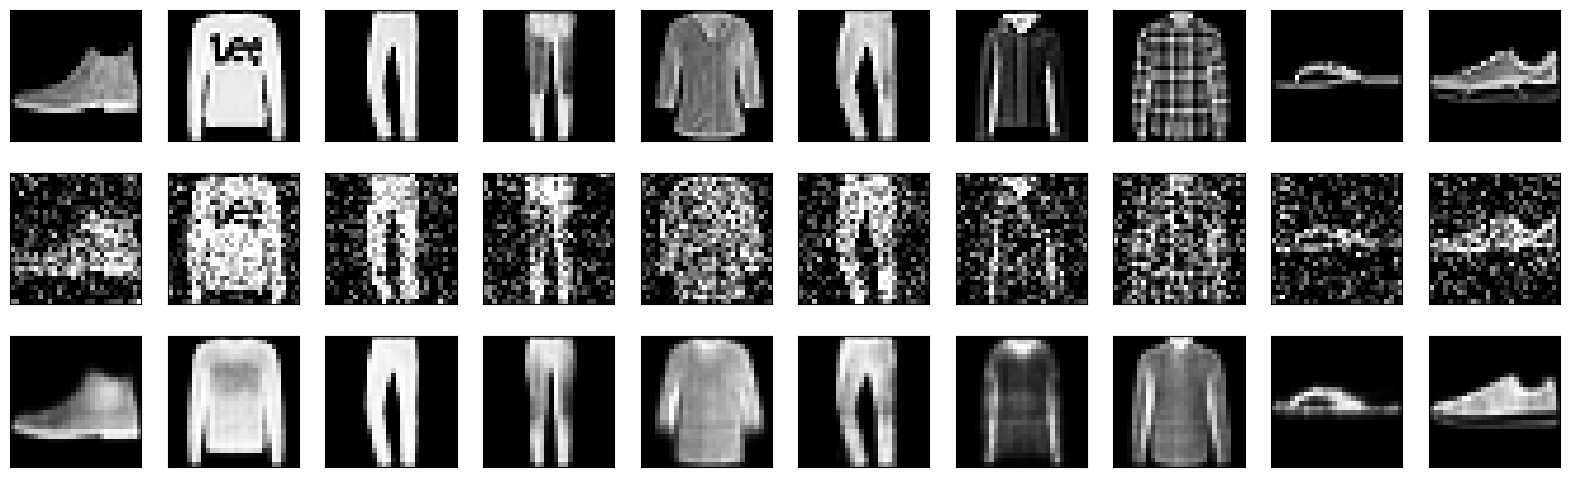

In [19]:
n=10
plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(3, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(3, n, i+1+n)
    plt.imshow(n_x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax = plt.subplot(3, n, i+1+n+n)
    plt.imshow(decoded_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()